<a href="https://colab.research.google.com/github/fabriciosantana/nlp/blob/main/AKCIT_NLP_M6_Colab_Unidade_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivos de Aprendizagem

*  Aplicar técnicas de Processamento de Linguagem Natural em Análise de sentimentos



# 6.1 Análise de Sentimentos em Comentários sobre restaurante em Inglês.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import io

Vamos fazer a leitura de um arquivo com comentários sobre um restaurante. Baixe o Arquivo 'Restaurant_Reviews.tsv' em https://drive.google.com/file/d/1ulP59sOf4jA4ziRGxNU3J_nRrPow3s_S/view?usp=drive_link e memorize onde você colocou o arquivo na sua máquina.

In [ ]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: 

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['Restaurant_Reviews.tsv']), delimiter='\t', quoting=3)
df.head()



,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


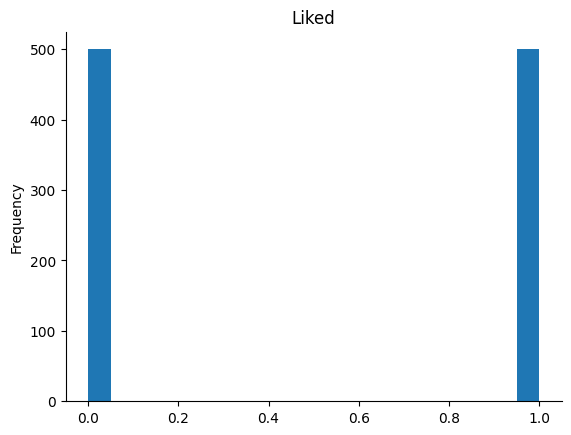

In [ ]:
# @title Liked

from matplotlib import pyplot as plt
df['Liked'].plot(kind='hist', bins=20, title='Liked')
plt.gca().spines[['top', 'right',]].set_visible(False)

Observem que temos duas colunas, a primeira com o comentário e a segunda com os valores 0 ou 1, sendo 1 para comentários positivos e 0 para comentários negativos. Além disso observe que temos um conjunto de dados balanceado com 500 comentários da classe positiva e 500 da classe negativa.

6.1.1 Agora podemos realizar algumas operações de pré-processmaneto, como remoção de stop-words e stemming. A função 'rep' é responsável por esse pré-processamento.

In [ ]:
import nltk
nltk.download('stopwords')

import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

def rep(review):
    review = re.sub('[^a-zA-Z]', ' ', review)
    review = review.lower()
    reviews = review.split()
    reviews = [stemmer.stem(x) for x in reviews if x not in stopwords.words('english')]
    review = ' '.join(reviews)
    return review


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


6.1.2 Vamos aplicar o pré-processamento definido anteriormente aos dados.

In [ ]:
df['Review'] = df['Review'].apply(rep)
df.head()

,Review,Liked
0,wow love place,1
1,crust good,0
2,tasti textur nasti,0
3,stop late may bank holiday rick steve recommen...,1
4,select menu great price,1


6.1.3 Precisamos converter nossos textos em uma representação vetorial

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = df['Review'].tolist()

cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = df['Liked'].tolist()

6.1.4 Precisamos separar dados para treinar o modelo e dados para testar. 20% dos dados serão usados para teste.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)


6.1.5 Vamos usar um classificador Bayesiano:

In [ ]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train, y_train)
print('Accuracy:{0: .1f}%'.format(clf.score(X_test, y_test) * 100))

Accuracy: 73.0%


Observe que tivemos uma acurácia de 73% nos testes, mas podemos ter uma análise mais fina, e que indica que ele teve um desempenho semelhante nas classes 0 e 1.

In [ ]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.82      0.57      0.67        97
     class 1       0.68      0.88      0.77       103

    accuracy                           0.73       200
   macro avg       0.75      0.73      0.72       200
weighted avg       0.75      0.73      0.72       200



6.1.6 Vamos ver como o modelo está se saindo com novos textos?

In [ ]:
new_review = 'This food is amazing... hummm'


new_review = rep(new_review)
new_review_vector = cv.transform([new_review]).toarray()
prediction = clf.predict(new_review_vector)
print(prediction)

NameError: name 'rep' is not defined